<a href="https://colab.research.google.com/github/eooloyede/Data-Analytics/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np

Read the Data using Pandas

In [2]:
df_heart = pd.read_csv('/content/sample_data/heart_2022_with_nans.csv')
df_heart

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [3]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

To check the data for missing values

In [4]:
df_heart.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

Column TetanusLast10Tdap has too many missing values, the entire column will be dropped

In [5]:
df_heart.drop(columns='TetanusLast10Tdap',axis=1, inplace=True)

In [6]:
df_heart.duplicated().sum()

166

Remove these 166 duplicates

In [7]:
df_heart.drop_duplicates(inplace=True)

In [8]:
df_heart.shape

(444966, 39)

In [9]:
#Dropping other irrelevant columns not contributing to heart disease
df_heart = df_heart.drop(columns=['State', 'MentalHealthDays', 'RemovedTeeth', 'HadSkinCancer', 'HadArthritis',\
                                  'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',\
                                  'DifficultyDressingBathing', 'DifficultyErrands', 'RaceEthnicityCategory',\
                                  'HeightInMeters', 'WeightInKilograms', 'HIVTesting', 'CovidPos', 'HighRiskLastYear'], axis=1)

There are some factors that contributes to heart disease. These variables will be selected out of the 39 columns

In [10]:
df_heart.shape

(444966, 23)

In [11]:
df_heart.isnull().sum()

Sex                          0
GeneralHealth             1193
PhysicalHealthDays       10922
LastCheckupTime           8301
PhysicalActivities        1088
SleepHours                5448
HadHeartAttack            3060
HadAngina                 4400
HadStroke                 1552
HadAsthma                 1768
HadCOPD                   2214
HadDepressiveDisorder     2807
HadKidneyDisease          1921
HadDiabetes               1082
DifficultyWalking        23867
SmokerStatus             35316
ECigaretteUsage          35514
ChestScan                55900
AgeCategory               9069
BMI                      48657
AlcoholDrinkers          46428
FluVaxLast12             46975
PneumoVaxEver            76894
dtype: int64

Columns with too many missing values and little effect on heart attack will also be dropped

In [12]:
df_heart = df_heart.drop(columns=['PneumoVaxEver'],axis=1)
df_heart.shape

(444966, 22)

The missing values from the selected variables for prediction will be dropped for all the categorical variables


In [13]:
df_heart['BMI'] = df_heart['BMI'].fillna(df_heart['BMI'].mean())

In [14]:
df_heart['SleepHours'] = df_heart['SleepHours'].fillna(df_heart['SleepHours'].mean())

The remaining missing values from categorical variables will be dropped

In [15]:
df_heart.dropna(axis=0, inplace=True)

In [16]:
df_heart.isnull().sum()

Sex                      0
GeneralHealth            0
PhysicalHealthDays       0
LastCheckupTime          0
PhysicalActivities       0
SleepHours               0
HadHeartAttack           0
HadAngina                0
HadStroke                0
HadAsthma                0
HadCOPD                  0
HadDepressiveDisorder    0
HadKidneyDisease         0
HadDiabetes              0
DifficultyWalking        0
SmokerStatus             0
ECigaretteUsage          0
ChestScan                0
AgeCategory              0
BMI                      0
AlcoholDrinkers          0
FluVaxLast12             0
dtype: int64

There are no more missing values

In [16]:
df_heart.shape

(343181, 22)

In [17]:
df_heart.head(5)

,Sex,GeneralHealth,PhysicalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,ECigaretteUsage,ChestScan,AgeCategory,BMI,AlcoholDrinkers,FluVaxLast12
0,Female,Very good,0.0,Within past year (anytime less than 12 months ...,No,8.0,No,No,No,No,...,No,Yes,No,Never smoked,Not at all (right now),No,Age 80 or older,28.52993,No,Yes
2,Female,Very good,2.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 55 to 59,25.61000,No,No
4,Female,Fair,2.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,Age 40 to 44,21.77000,Yes,No
5,Male,Poor,1.0,Within past year (anytime less than 12 months ...,No,7.0,Yes,No,Yes,No,...,No,Yes,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 80 or older,26.08000,No,No
6,Female,Very good,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,No,...,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,Age 80 or older,22.96000,Yes,No


In [18]:
df_heart.tail(5)

,Sex,GeneralHealth,PhysicalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,ECigaretteUsage,ChestScan,AgeCategory,BMI,AlcoholDrinkers,FluVaxLast12
445123,Female,Fair,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 25 to 29,24.34,No,No
445124,Male,Good,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,Yes,No,...,No,Yes,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 65 to 69,29.86,Yes,Yes
445126,Male,Good,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,8.0,No,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 30 to 34,31.19,Yes,No
445128,Female,Excellent,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 50 to 54,28.66,No,Yes
445130,Male,Very good,0.0,Within past year (anytime less than 12 months ...,No,5.0,Yes,No,No,Yes,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,Age 70 to 74,32.55,No,Yes


In [19]:
#Reindexing the rows
df_heart = df_heart.reset_index(drop=True)

Now that the data is clean, we can do some exploratory data analysis

In [20]:
df_heart.shape

(343181, 22)

In [21]:
df_heart.describe()

,PhysicalHealthDays,SleepHours,BMI
count,343181.000000,343181.000000,343181.000000
mean,4.215012,7.021741,28.578539
std,8.516457,1.446634,6.336259
min,0.000000,1.000000,12.020000
25%,0.000000,6.000000,24.370000
50%,0.000000,7.000000,27.940000
75%,3.000000,8.000000,31.410000
max,30.000000,24.000000,97.650000


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

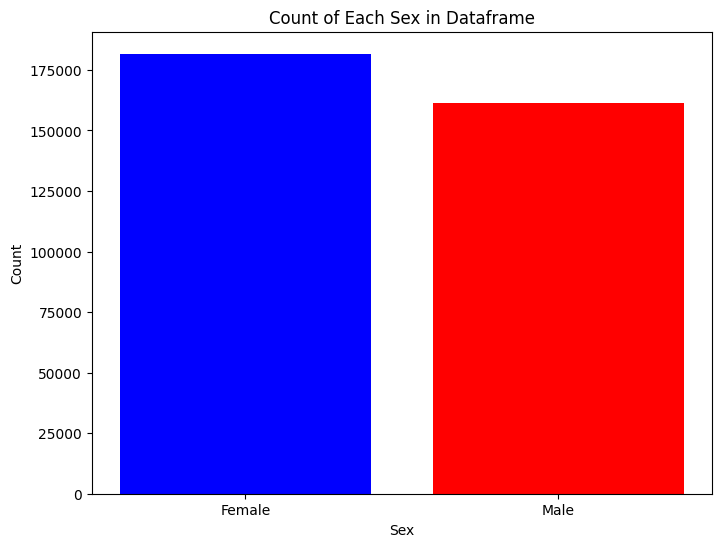

In [23]:
sex_counts = df_heart['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'red'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Each Sex in Dataframe')
plt.show()

In [24]:
df_heart["HadHeartAttack"].value_counts()

HadHeartAttack
No     324866
Yes     18315
Name: count, dtype: int64

There are more people without heart attack than those with heart attack. There is a need to balance this dataset when preprocessing it for machine learning

([<matplotlib.patches.Wedge at 0x7d251324b8b0>,
 [Text(-1.0845754652427255, 0.1835648664465117, 'No'),
  Text(1.084575469539371, -0.18356484106019066, 'Yes')])

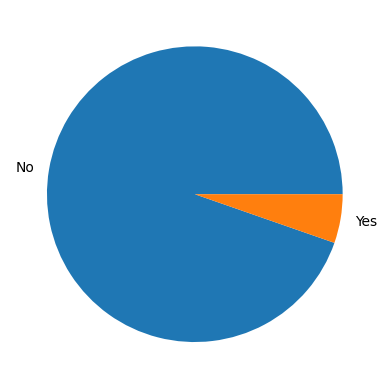

In [25]:
pielabel = df_heart["HadHeartAttack"].unique()
plt.pie(df_heart["HadHeartAttack"].value_counts(), labels=pielabel)

(array([4.09300e+03, 3.20060e+04, 1.82802e+05, 1.20665e+05, 2.58900e+03,
        3.28000e+02, 4.50000e+02, 1.25000e+02, 8.10000e+01, 4.20000e+01]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

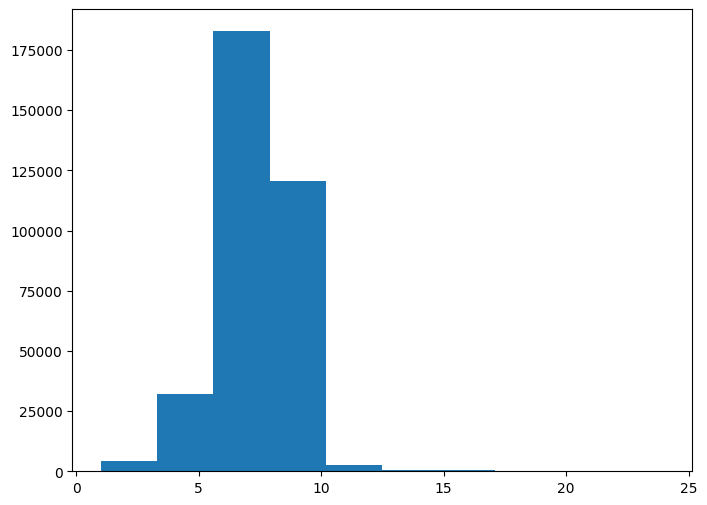

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df_heart['SleepHours'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d25131a8f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2513144df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d25131a8cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d25131a92a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d25131a9540>],
 'means': []}

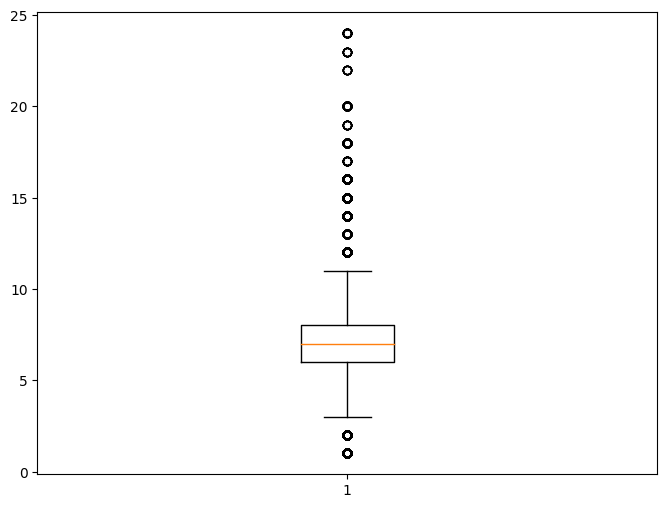

In [27]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_heart['SleepHours'])

The outliers in the sleep hours will be retained because it is sure possible for some people to sleep above the quartile range

In [28]:
df_heart['SleepHours'].unique()

array([ 8.        ,  5.        ,  9.        ,  7.        ,  6.        ,
        4.        , 10.        ,  1.        ,  7.02289554, 18.        ,
       12.        ,  3.        ,  2.        , 11.        , 15.        ,
       13.        , 16.        , 14.        , 20.        , 24.        ,
       23.        , 19.        , 17.        , 22.        ])

**Encoding our categorical variables to numeric**

In [29]:
df_heart['AgeCategory'].replace({'Age 18 to 24': 1,'Age 25 to 29':2, 'Age 30 to 34' : 3,\
                                          'Age 35 to 39':4, 'Age 40 to 44':5, 'Age 45 to 49':6,\
                                          'Age 50 to 54':7, 'Age 55 to 59':8, 'Age 60 to 64':9,\
                                          'Age 65 to 69':10, 'Age 70 to 74':11, 'Age 75 to 79':12,\
                                          'Age 80 or older':13}, inplace=True)

In [30]:
df_heart['HadHeartAttack'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['PhysicalActivities'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadAngina'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadStroke'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadAsthma'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadKidneyDisease'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadDiabetes'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['DifficultyWalking'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['ChestScan'].replace({'Yes':1, 'No':0}, inplace=True)

In [32]:
df_heart['SmokerStatus'].replace({'Never smoked': 0, 'Former smoker' : 1, 'Current smoker - now smokes some days':2, 'Current smoker - now smokes every day':3}, inplace=True)
df_heart['ECigaretteUsage'].replace({'Never used e-cigarettes in my entire life':0, 'Not at all (right now)':1, 'Use them some days':2, 'Use them every day':3}, inplace=True)

In [34]:
df_heart['GeneralHealth'].replace({'Very good': 4, 'Excellent' : 5, 'Good':3, 'Fair':2, 'Poor':1}, inplace=True)
df_heart['Sex'].replace({'Male':1, 'Female':0}, inplace=True)
df_heart['FluVaxLast12'].replace({'Yes':1, 'No':0}, inplace=True)

In [37]:
df_heart['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)',
       '5 or more years ago'], dtype=object)

In [40]:
df_heart['HadCOPD'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadDepressiveDisorder'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['LastCheckupTime'] = df_heart['LastCheckupTime'].replace({"5 or more years ago":4, 'Within past 5 years (2 years but less than 5 years ago)':3, 'Within past 2 years (1 year but less than 2 years ago)':2, 'Within past year (anytime less than 12 months ago)':1})

In [44]:
df_heart['AlcoholDrinkers'].replace({'Yes':1, 'No':0}, inplace=True)

In [48]:
df_heart['HadDiabetes'].replace({'Yes, but only during pregnancy (female)':1, 'No, pre-diabetes or borderline diabetes':0}, inplace=True)

In [49]:
df_heart

,Sex,GeneralHealth,PhysicalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,ECigaretteUsage,ChestScan,AgeCategory,BMI,AlcoholDrinkers,FluVaxLast12
0,0,4,0.0,1,0,8.0,0,0,0,0,...,0,1,0,0,1,0,13,28.52993,0,1
1,0,4,2.0,1,1,5.0,0,0,0,0,...,0,0,0,0,0,0,8,25.61000,0,0
2,0,2,2.0,1,1,9.0,0,0,0,0,...,0,0,0,0,0,1,5,21.77000,1,0
3,1,1,1.0,1,0,7.0,1,0,1,0,...,0,1,0,0,0,0,13,26.08000,0,0
4,0,4,0.0,1,1,7.0,0,0,0,0,...,0,0,0,1,0,0,13,22.96000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343176,0,2,0.0,1,1,7.0,0,0,0,0,...,0,0,0,0,0,0,2,24.34000,0,0
343177,1,3,0.0,1,1,7.0,0,0,1,0,...,0,1,0,0,0,0,10,29.86000,1,1
343178,1,3,0.0,2,1,8.0,0,0,0,0,...,0,0,0,0,0,0,3,31.19000,1,0
343179,0,5,2.0,1,1,7.0,0,0,0,0,...,0,0,0,0,0,0,7,28.66000,0,1


In [50]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343181 entries, 0 to 343180
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    343181 non-null  int64  
 1   GeneralHealth          343181 non-null  int64  
 2   PhysicalHealthDays     343181 non-null  float64
 3   LastCheckupTime        343181 non-null  int64  
 4   PhysicalActivities     343181 non-null  int64  
 5   SleepHours             343181 non-null  float64
 6   HadHeartAttack         343181 non-null  int64  
 7   HadAngina              343181 non-null  int64  
 8   HadStroke              343181 non-null  int64  
 9   HadAsthma              343181 non-null  int64  
 10  HadCOPD                343181 non-null  int64  
 11  HadDepressiveDisorder  343181 non-null  int64  
 12  HadKidneyDisease       343181 non-null  int64  
 13  HadDiabetes            343181 non-null  int64  
 14  DifficultyWalking      343181 non-nu

All the Categorical variables have been rightly encoded

In [51]:
df_heart.iloc[0]

Sex                       0.00000
GeneralHealth             4.00000
PhysicalHealthDays        0.00000
LastCheckupTime           1.00000
PhysicalActivities        0.00000
SleepHours                8.00000
HadHeartAttack            0.00000
HadAngina                 0.00000
HadStroke                 0.00000
HadAsthma                 0.00000
HadCOPD                   0.00000
HadDepressiveDisorder     0.00000
HadKidneyDisease          0.00000
HadDiabetes               1.00000
DifficultyWalking         0.00000
SmokerStatus              0.00000
ECigaretteUsage           1.00000
ChestScan                 0.00000
AgeCategory              13.00000
BMI                      28.52993
AlcoholDrinkers           0.00000
FluVaxLast12              1.00000
Name: 0, dtype: float64

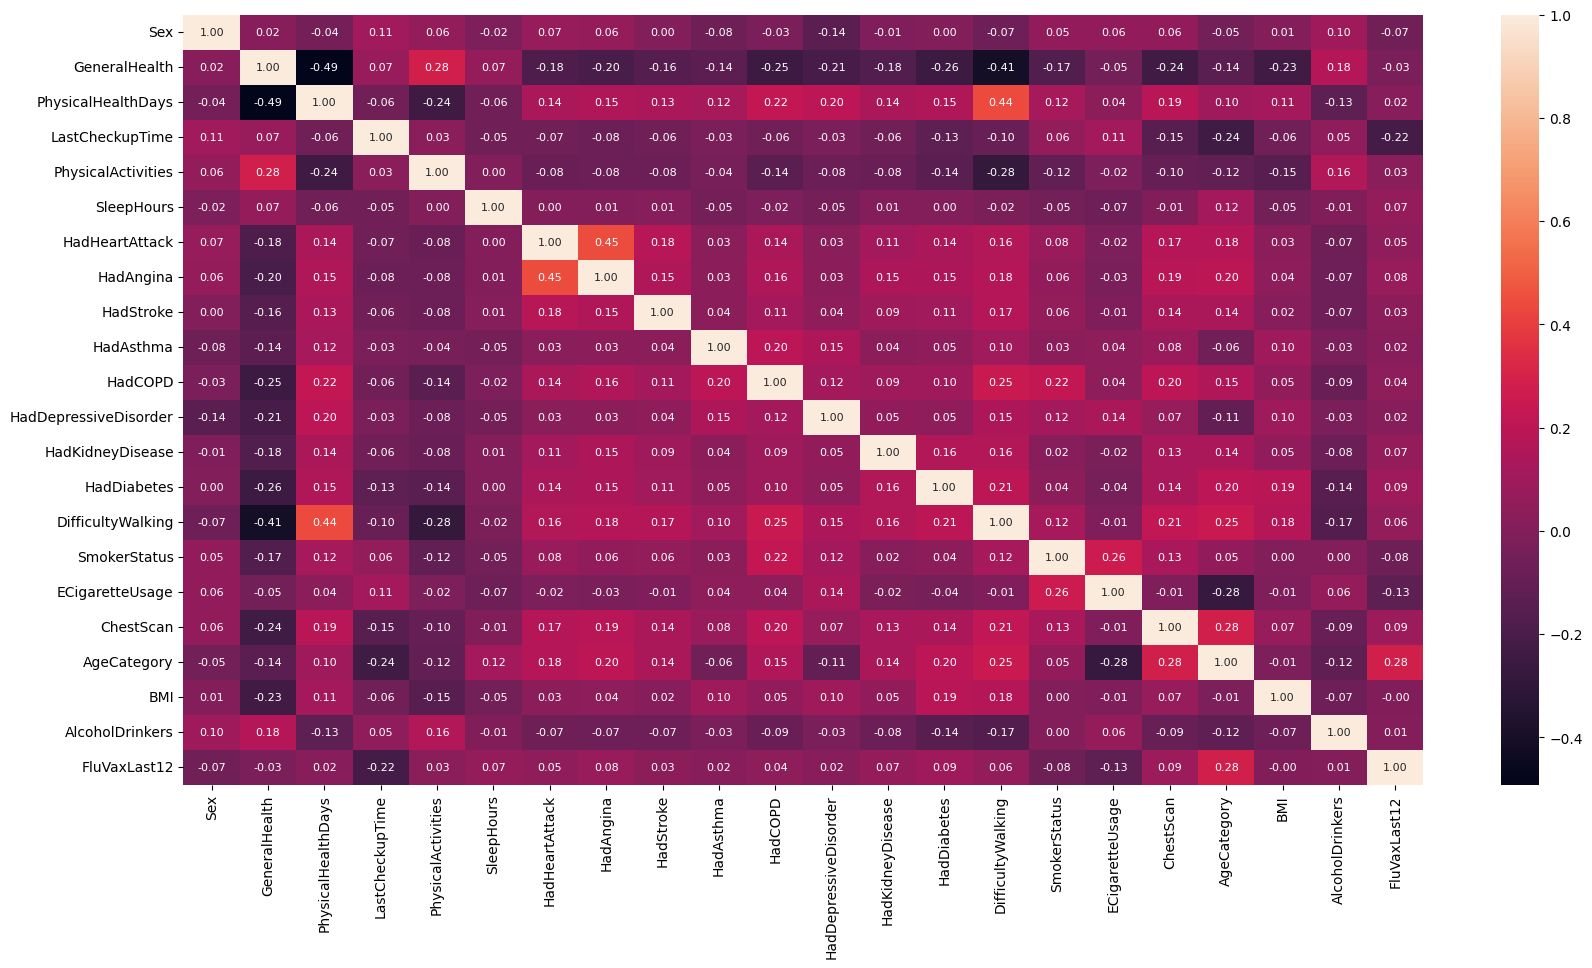

In [53]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    df_heart.corr(),
    annot=True,
    annot_kws={"fontsize": 8},
    fmt=".2f",
    xticklabels=True,
    yticklabels=True,
);

**Data Balancing**

In [54]:
df_heart_ML = df_heart.copy()

In [57]:
df_heart_ML.shape, df_heart.shape

((343181, 22), (343181, 22))

**Data Undersampling**

In [58]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.5)

In [59]:
X_df = df_heart_ML.drop(columns=['HadHeartAttack'])
Y_df = df_heart_ML['HadHeartAttack']

In [61]:
X_df.shape,Y_df.shape

((343181, 21), (343181,))

In [62]:
X_df_resample, Y_df_resample = rus.fit_resample(X_df, Y_df)


([<matplotlib.patches.Wedge at 0x7d251228c9d0>,
 [Text(-0.5500000594609755, 0.9526279098330699, '0'),
  Text(0.5500001486524352, -0.9526278583383436, '1')])

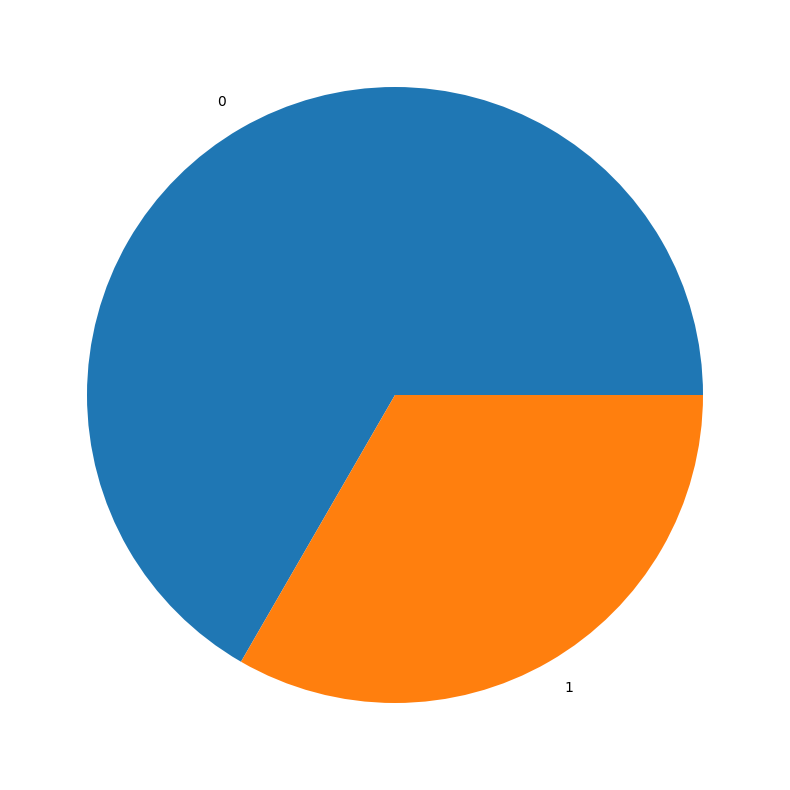

In [63]:
pielabel = Y_df_resample.unique()
plt.pie(Y_df_resample.value_counts(), labels=pielabel)

In [64]:
Y_df_resample.value_counts()

HadHeartAttack
0    36630
1    18315
Name: count, dtype: int64

The value of 1 remain the same while the value of 0 has been reduced

Undersampling was used because we do not want to generate any synthetic data for machine learning

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test1, y_train, y_test1 = train_test_split(
    X_df_resample,
    Y_df_resample,
    test_size=0.2,
    stratify=Y_df_resample,
    random_state=42,
)

In [84]:
len(X_train)

43956

In [69]:
y_train.value_counts()

HadHeartAttack
0    29304
1    14652
Name: count, dtype: int64

In [70]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test1,
    y_test1,
    test_size=0.5,
    stratify=y_test1,
    random_state=42,
)

In [72]:
X_test.shape, y_test.shape, X_validation.shape, y_validation.shape

((5494, 21), (5494,), (5495, 21), (5495,))

In [73]:
import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input

In [74]:
X_train.shape[1]

21

In [110]:
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [111]:
epoch = 200
from keras.optimizers import Adam
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 5)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [112]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [118]:
history = model.fit(X_train, y_train,batch_size = 50, steps_per_epoch = len(X_train)//50, epochs=epoch, callbacks=[early_stopping], validation_data = (X_test, y_test),validation_steps=len(X_test)//50)

Epoch 1/200
879/879 [==============================] - 4s 4ms/step - loss: 0.3963 - accuracy: 0.8261 - val_loss: 0.4337 - val_accuracy: 0.8279
Epoch 2/200
879/879 [==============================] - 5s 6ms/step - loss: 0.3965 - accuracy: 0.8272 - val_loss: 0.4363 - val_accuracy: 0.8292
Epoch 3/200
879/879 [==============================] - 4s 5ms/step - loss: 0.3952 - accuracy: 0.8270 - val_loss: 0.4310 - val_accuracy: 0.8270
Epoch 4/200
879/879 [==============================] - 4s 4ms/step - loss: 0.3943 - accuracy: 0.8274 - val_loss: 0.4348 - val_accuracy: 0.8292
Epoch 5/200
879/879 [==============================] - 4s 5ms/step - loss: 0.3951 - accuracy: 0.8284 - val_loss: 0.4328 - val_accuracy: 0.8275
Epoch 6/200
879/879 [==============================] - 5s 6ms/step - loss: 0.3957 - accuracy: 0.8272 - val_loss: 0.4357 - val_accuracy: 0.8268
Epoch 7/200
879/879 [==============================] - 4s 4ms/step - loss: 0.3964 - accuracy: 0.8263 - val_loss: 0.4343 - val_accuracy: 0.8279

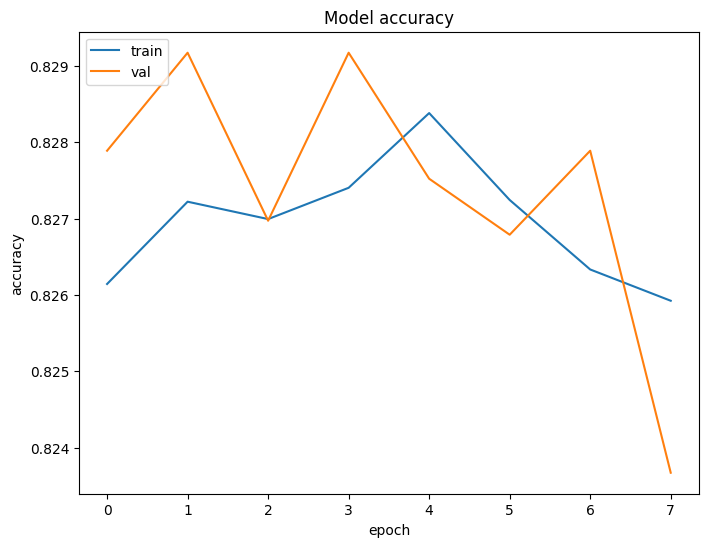

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

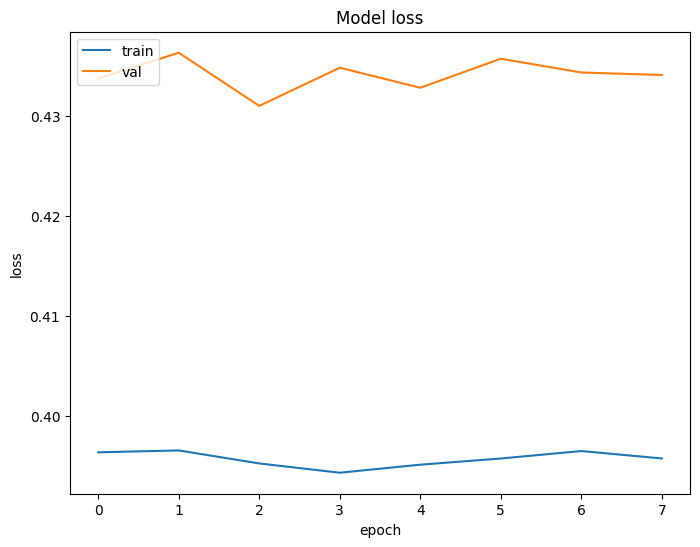

In [122]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [121]:
model.evaluate(X_validation, y_validation)

172/172 [==============================] - 1s 3ms/step - loss: 0.4343 - accuracy: 0.8226


[0.43427667021751404, 0.8225659728050232]

In [123]:
y_pred = model.predict(X_validation)

172/172 [==============================] - 1s 3ms/step


In [124]:
y_pred

array([[0.811037  , 0.188963  ],
       [0.7122823 , 0.28771776],
       [0.3618168 , 0.63818306],
       ...,
       [0.7938758 , 0.20612417],
       [0.7688656 , 0.2311344 ],
       [0.48440874, 0.5155913 ]], dtype=float32)

In [125]:
y_pred_actual = np.argmax(y_pred, axis=1)

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred_actual)

In [127]:
print(cm)

[[3481  182]
 [ 793 1039]]


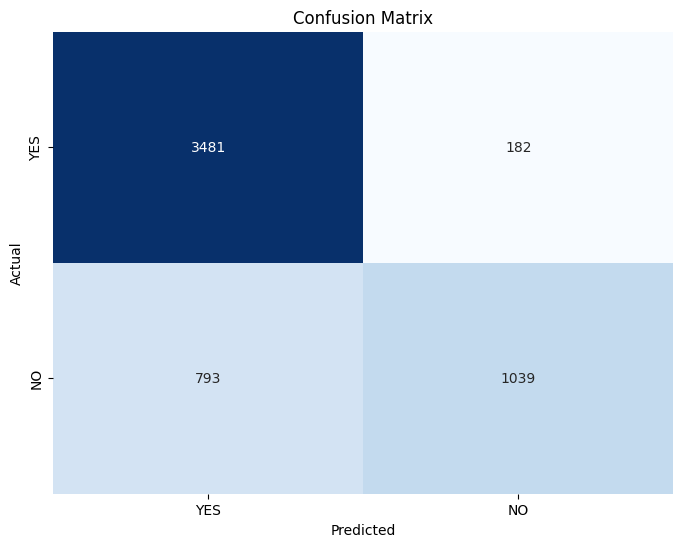

In [128]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['YES', 'NO'], yticklabels=['YES', 'NO'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [129]:
from sklearn.metrics import f1_score,average_precision_score,average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc

In [130]:
CR = classification_report(y_validation, y_pred_actual)
print(CR)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      3663
           1       0.85      0.57      0.68      1832

    accuracy                           0.82      5495
   macro avg       0.83      0.76      0.78      5495
weighted avg       0.83      0.82      0.81      5495



In [131]:
print("Precision:", precision_score(y_validation, y_pred_actual))
print("Recall:", recall_score(y_validation, y_pred_actual))
print("F1:", f1_score(y_validation, y_pred_actual))
print("AUC", average_precision_score(y_validation, y_pred_actual))

Precision: 0.8509418509418509
Recall: 0.5671397379912664
F1: 0.6806419914837865
AUC 0.6269159502178999


Data Oversampling for building the model

In [132]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.5)

In [133]:
X_df_resample2, Y_df_resample2 = ros.fit_resample(X_df, Y_df)

In [134]:
X_df_resample2.shape, Y_df_resample2.shape

((487299, 21), (487299,))

In [136]:
Y_df_resample2.value_counts()

HadHeartAttack
0    324866
1    162433
Name: count, dtype: int64

There are more samples than the original data and the dataset is now oversampled

([<matplotlib.patches.Wedge at 0x7d249e802680>,
 [Text(-0.5500000594609755, 0.9526279098330699, '0'),
  Text(0.5500001486524352, -0.9526278583383436, '1')])

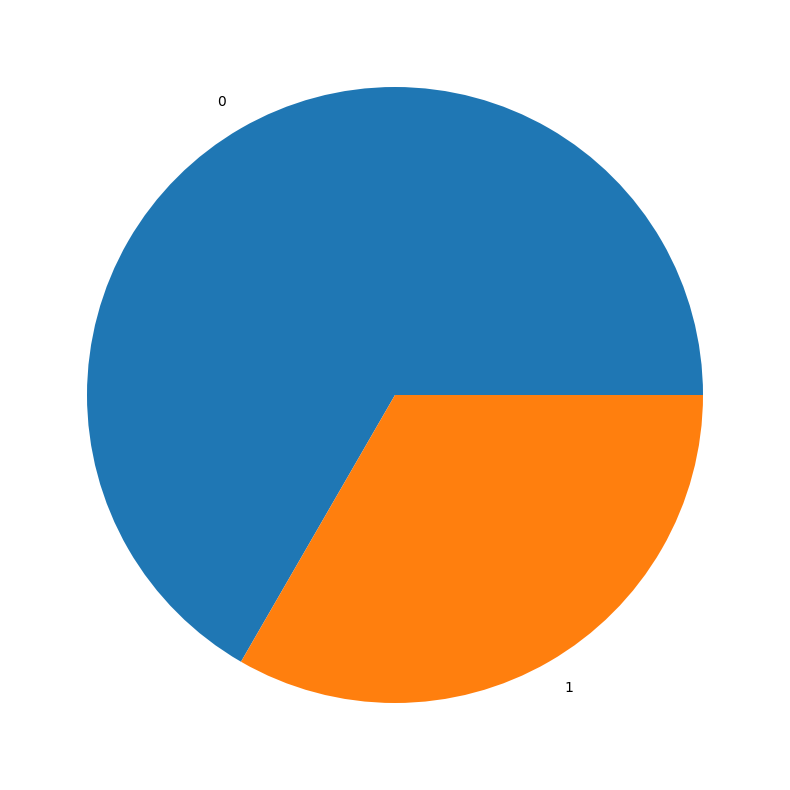

In [135]:
pielabel = Y_df_resample2.unique()
plt.pie(Y_df_resample2.value_counts(), labels=pielabel)

In [138]:
X_train2, X_test21, y_train2, y_test21 = train_test_split(
    X_df_resample2,
    Y_df_resample2,
    test_size=0.2,
    stratify=Y_df_resample2,
    random_state=42,
)

In [139]:
X_test2, X_validation2, y_test2, y_validation2 = train_test_split(
    X_test21,
    y_test21,
    test_size=0.5,
    stratify=y_test21,
    random_state=42,
)

In [141]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [150]:
early_stopping2 = tf.keras.callbacks.EarlyStopping(patience = 4)

In [151]:
opt2 = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])

In [154]:
history2 = model1.fit(X_train2, y_train2,batch_size = 1000, steps_per_epoch = len(X_train2)//1000, epochs=10, validation_data = (X_test2, y_test2),validation_steps=len(X_test2)//1000)

Epoch 1/10
389/389 [==============================] - 5s 13ms/step - loss: 0.4016 - accuracy: 0.8260
Epoch 2/10
389/389 [==============================] - 6s 15ms/step - loss: 0.4014 - accuracy: 0.8257
Epoch 3/10
389/389 [==============================] - 5s 12ms/step - loss: 0.4011 - accuracy: 0.8263
Epoch 4/10
389/389 [==============================] - 6s 15ms/step - loss: 0.4005 - accuracy: 0.8266
Epoch 5/10
389/389 [==============================] - 6s 14ms/step - loss: 0.3996 - accuracy: 0.8263
Epoch 6/10
389/389 [==============================] - 5s 12ms/step - loss: 0.4003 - accuracy: 0.8261
Epoch 7/10
389/389 [==============================] - 6s 16ms/step - loss: 0.3992 - accuracy: 0.8271
Epoch 8/10
389/389 [==============================] - 5s 13ms/step - loss: 0.4001 - accuracy: 0.8266
Epoch 9/10
389/389 [==============================] - 5s 12ms/step - loss: 0.3990 - accuracy: 0.8267
Epoch 10/10
389/389 [==============================] - 7s 17ms/step - loss: 0.3993 - accura

In [155]:
model1.evaluate(X_validation2, y_validation2)

1523/1523 [==============================] - 3s 2ms/step - loss: 0.4129 - accuracy: 0.8278


[0.41293925046920776, 0.8277857303619385]

The undersampling and oversampling gave almost the same accuracy for both deep learning model.